In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset
import CNN_RAVDESS
import CNN_github

In [2]:
# interfacce function to get splited dataset
dataset_collection = dataset.getMFCCDatasetRAVDESS(train_size = 0.6, valid_size = 0.2, test_size = 0.2)

X_train = dataset_collection['X_train']
Y_train = dataset_collection['Y_train']
X_valid = dataset_collection['X_valid']
Y_valid = dataset_collection['Y_valid']
X_test = dataset_collection['X_test']
Y_test = dataset_collection['Y_test']

X_train_norm = dataset_collection['X_train_norm']
X_valid_norm = dataset_collection['X_valid_norm']
X_test_norm = dataset_collection['X_test_norm']

In [126]:
print(X_train.shape)

(862, 1500, 19)


In [3]:
# convert array to tensor
X_train_norm = tf.convert_to_tensor(X_train_norm)
X_valid_norm = tf.convert_to_tensor(X_valid_norm)
X_test_norm = tf.convert_to_tensor(X_test_norm)
Y_train = tf.convert_to_tensor(Y_train)
Y_valid = tf.convert_to_tensor(Y_valid)
Y_test = tf.convert_to_tensor(Y_test)

X_train = tf.convert_to_tensor(X_train)
X_valid = tf.convert_to_tensor(X_valid)
X_test = tf.convert_to_tensor(X_test)

In [4]:
def convolutional_model(input_shape):
        """
        Implements the forward propagation for the model:
        CONV2D -> RELU -> MAXPOOL -> CONV2D -> Softmax -> MAXPOOL -> FLATTEN -> DENSE
        
        Arguments:
        input_mfcc -- input dataset, of shape (input_shape)

        Returns:
        model -- TF Keras model (object containing the information for the entire training process) 
        """

        input_mfcc = tf.keras.Input(shape=input_shape)
        ## CONV1D: 4 filters 8, stride of 1, padding 'SAME'
        Z1 = tfl.Conv1D(filters = 8, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(input_mfcc)
        ## RELU
        A1 = tfl.ReLU()(Z1)
        ## MAXPOOL: window 8, stride 4, padding 'SAME'
        P1 = tfl.MaxPool1D(pool_size = 8, strides = 4, padding='same')(A1)
        
        D1 = tfl.Dropout(0.2)(P1)

        ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
        Z2 = tfl.Conv1D(filters = 4, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(D1)
        ## RELU
        A2 = tfl.ReLU()(Z2)
        ## MAXPOOL: window 4, stride 2, padding 'SAME'
        P2 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A2)

        D2 = tfl.Dropout(0.2)(P2)

        ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
        Z3 = tfl.Conv1D(filters = 2, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(D2)
        ## RELU
        A3 = tfl.ReLU()(Z3)
        ## MAXPOOL: window 4, stride 2, padding 'SAME'
        P3 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A3)

        D3 = tfl.Dropout(0.2)(P3)

        ## FLATTEN
        F = tfl.Flatten()(D3)
        # D3 = tfl.Dropout(0.2)(F)
        ## Dense layer
        ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
        # Den1 = tfl.Dense(64, activation='ReLU', kernel_regularizer = 'L1')(F)
        outputs = tfl.Dense(8, activation='softmax')(F)
        model = tf.keras.Model(inputs=input_mfcc, outputs=outputs)
        return model


In [9]:
conv_model = CNN_github.CNN1D.make(input_shape1=1500,input_shape2=19, n_kernels=4, kernel_sizes=[4,4], hidden_size=8)

TypeError: object.__init__() takes exactly one argument (the instance to initialize)

In [129]:
# conv_model = CNN_RAVDESS.CNN.convolutional_model((512, 19))
conv_model = convolutional_model((1500, 19))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 1500, 19)]        0         
                                                                 
 conv1d_61 (Conv1D)          (None, 750, 8)            616       
                                                                 
 re_lu_48 (ReLU)             (None, 750, 8)            0         
                                                                 
 max_pooling1d_61 (MaxPoolin  (None, 188, 8)           0         
 g1D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 188, 8)            0         
                                                                 
 conv1d_62 (Conv1D)          (None, 94, 4)             132       
                                                          

In [130]:
print(X_train_norm)

tf.Tensor(
[[[-3.21645439e-01  4.11361903e-01 -3.31078202e-01 ...  2.24618584e-01
    1.75617561e-01  3.03400785e-01]
  [-3.45107704e-01  2.31135055e-01 -3.02340388e-01 ...  5.76887503e-02
    1.00362882e-01  3.49177778e-01]
  [-4.22606558e-01 -4.26860973e-02 -4.79505062e-01 ...  9.89179835e-02
    5.65100014e-02  4.33884650e-01]
  ...
  [-2.95576721e-01 -5.24434566e-01 -1.01636791e+00 ... -2.28756741e-02
    1.94574464e-02  1.73930407e-01]
  [ 1.08215436e-01 -4.38879907e-01 -1.07911801e+00 ... -9.20850560e-02
    2.10097373e-01 -2.54280362e-02]
  [ 2.75322914e-01 -4.98669565e-01 -7.89291859e-01 ... -5.16892150e-02
    2.26271242e-01 -3.66698444e-01]]

 [[-3.03480297e-01  6.96851969e-01 -7.15361655e-01 ...  2.08144832e+00
   -3.00946087e-01 -7.64640749e-01]
  [ 4.84242082e-01  1.72738627e-01 -1.11823761e+00 ...  1.89030266e+00
   -1.55135363e-01 -1.20491135e+00]
  [ 1.41461003e+00 -1.40421450e-01 -1.37788165e+00 ...  8.94321442e-01
   -3.26423675e-01 -1.29304516e+00]
  ...
  [ 7.456226

In [131]:
history = conv_model.fit(X_train_norm, Y_train, epochs=500, validation_data=(X_valid_norm, Y_valid))

Epoch 1/500
27/27 [==============================] - 6s 58ms/step - loss: 7.0203 - accuracy: 0.1369 - val_loss: 3.6103 - val_accuracy: 0.1298
Epoch 2/500
27/27 [==============================] - 1s 27ms/step - loss: 4.2537 - accuracy: 0.1230 - val_loss: 3.2574 - val_accuracy: 0.0702
Epoch 3/500
27/27 [==============================] - 1s 23ms/step - loss: 3.5979 - accuracy: 0.1357 - val_loss: 3.1897 - val_accuracy: 0.0982
Epoch 4/500
27/27 [==============================] - 1s 24ms/step - loss: 3.3566 - accuracy: 0.1288 - val_loss: 3.1567 - val_accuracy: 0.1053
Epoch 5/500
27/27 [==============================] - 1s 24ms/step - loss: 3.2670 - accuracy: 0.1125 - val_loss: 3.1306 - val_accuracy: 0.1193
Epoch 6/500
27/27 [==============================] - 1s 25ms/step - loss: 3.1749 - accuracy: 0.1381 - val_loss: 3.1065 - val_accuracy: 0.1088
Epoch 7/500
27/27 [==============================] - 1s 27ms/step - loss: 3.1615 - accuracy: 0.1009 - val_loss: 3.0836 - val_accuracy: 0.1333
Epoch 

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

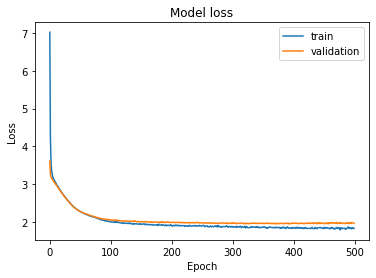

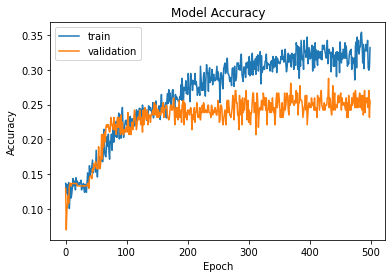

In [133]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')